Malll customer sagmentation using the clustering 

In [1]:
#import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram,linkage
import warnings
warnings.filterwarnings('ignore')

Read and load the data


In [2]:
path=os.path.join("..","data","Mall_Customers.csv")
df=pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Analyze the data

In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:

# Rename columns for easier access
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore',}, inplace=True)


Exploratory Data Analysis (EDA)

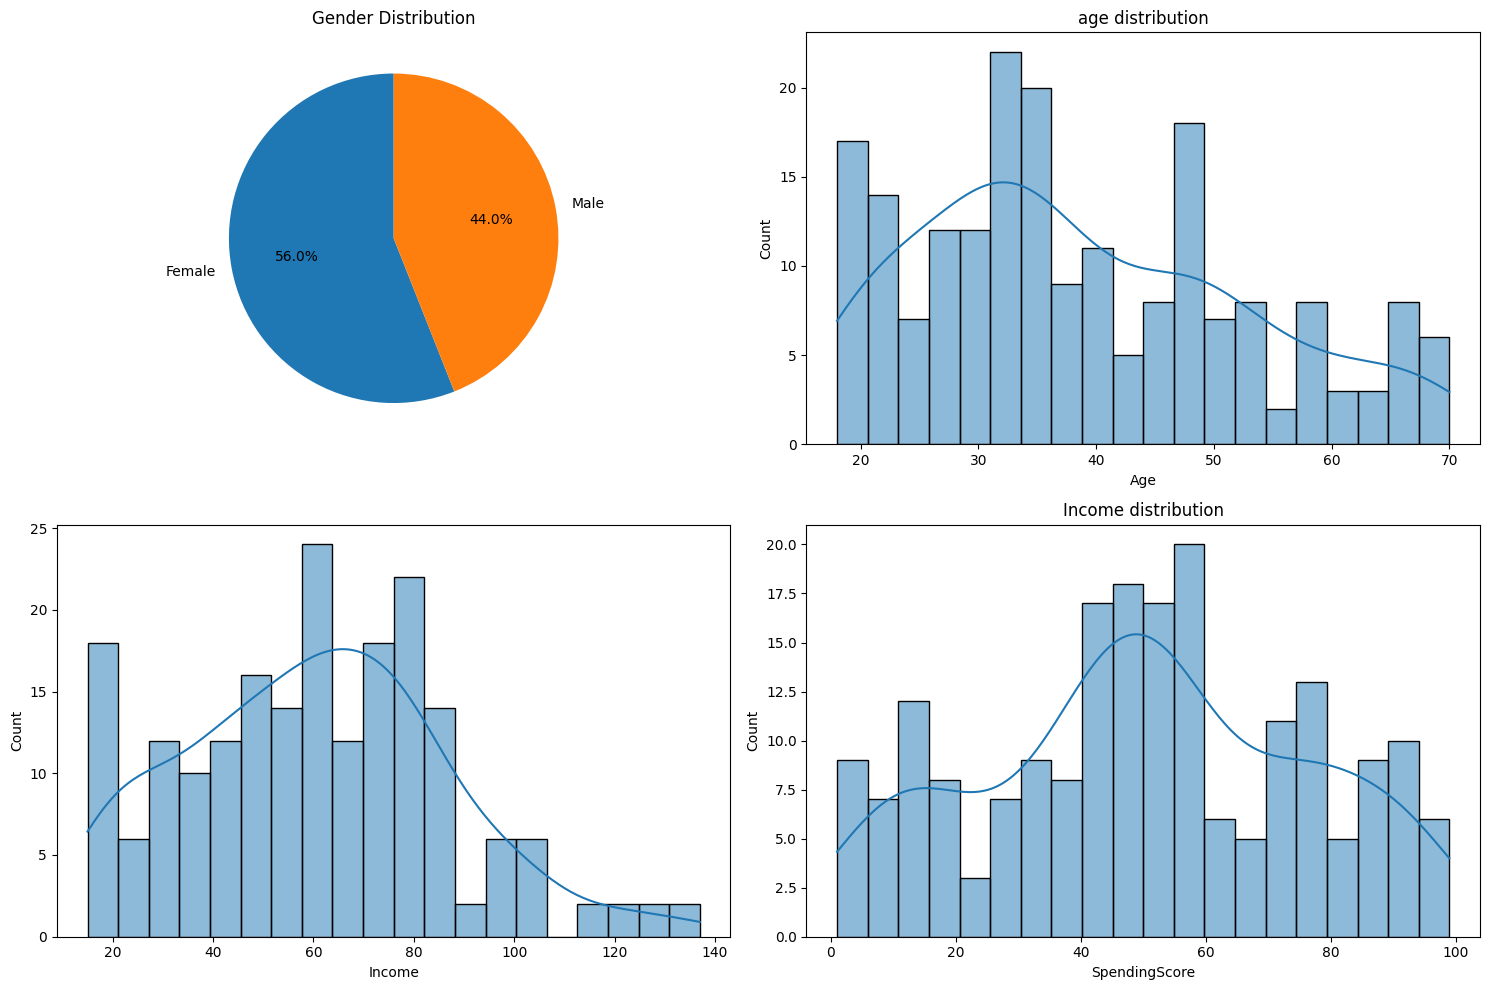

In [7]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#Gender distribution
gender_counts=df["Genre"].value_counts()
axes[0,0].pie(gender_counts,labels=gender_counts.index,autopct="%1.1f%%",startangle=90)
axes[0,0].set_title("Gender Distribution")

#age distribution
sns.histplot(df["Age"],bins=20,kde=True,ax=axes[0,1])
axes[0,1].set_title("age distribution")

#sepnding score distribution
sns.histplot(df['SpendingScore'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Spending Score Distribution')

#Income distribution
sns.histplot(df["Income"],bins=20,kde=True,ax=axes[1,0])
axes[1,1].set_title("Income distribution")

plt.tight_layout()

plt.show()

prepare the data

In [8]:
X=df[["Age","Income","SpendingScore"]].values

scaler=StandardScaler()
x_scalead=scaler.fit_transform(X)
print("scaled data shape ",x_scalead.shape)

scaled data shape  (200, 3)


K-means clustering

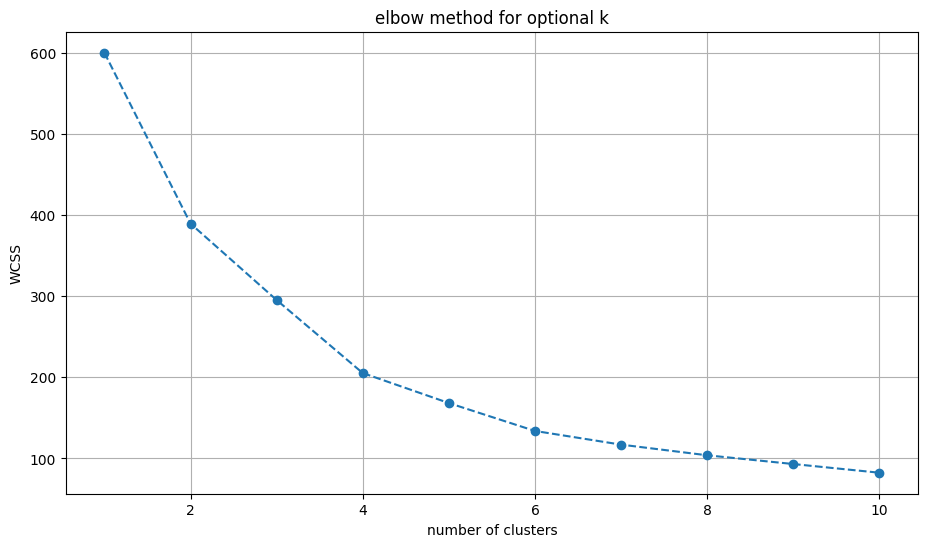

In [12]:
wcss=[] # Within-Cluster Sum of Squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=42)
    kmeans.fit(x_scalead)
    wcss.append(kmeans.inertia_)

#plot the elbow curve
plt.figure(figsize=(11,6))
plt.plot(range(1,11),wcss,marker="o",linestyle="--")
plt.title("elbow method for optional k")
plt.grid(True)
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42,n_init=10)
kmeans_label=kmeans.fit_predict(x_scalead)

df["KMeans_Cluster"]=kmeans_label

kmeans_silhoutte=silhouette_score(x_scalead,kmeans_label)
print(f"k means silhoute score:{kmeans_silhoutte:.3f}")

k means silhoute score:0.417


# Visualize K-Means clusters

age vs income

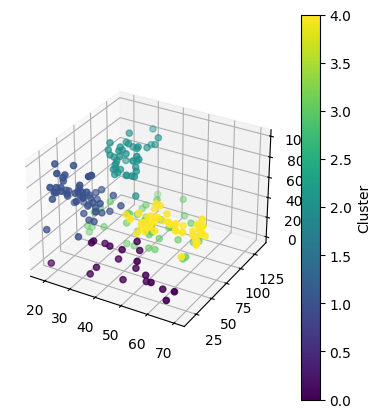

In [17]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(131,projection="3d")
scatter=ax1.scatter(df["Age"],df["Income"],df["SpendingScore"],c=df["KMeans_Cluster"],cmap="viridis"
                    )
plt.colorbar(scatter,ax=ax1,label="Cluster")
plt.show()

age vs spending score

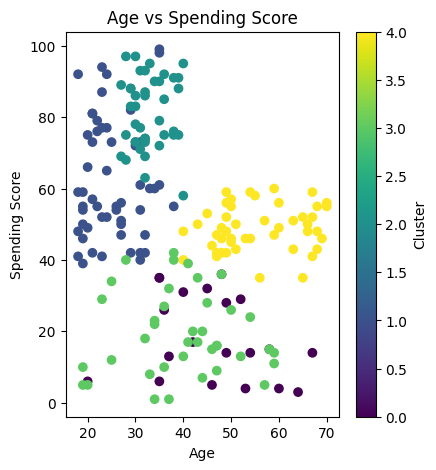

In [20]:
fig = plt.figure(figsize=(15, 5))
ax2 = fig.add_subplot(132)
scatter = ax2.scatter(df['Age'], df['SpendingScore'], c=df['KMeans_Cluster'], cmap='viridis')
ax2.set_xlabel('Age')
ax2.set_ylabel('Spending Score')
ax2.set_title('Age vs Spending Score')
plt.colorbar(scatter, ax=ax2, label='Cluster')
plt.show()

 Income vs Spending Score

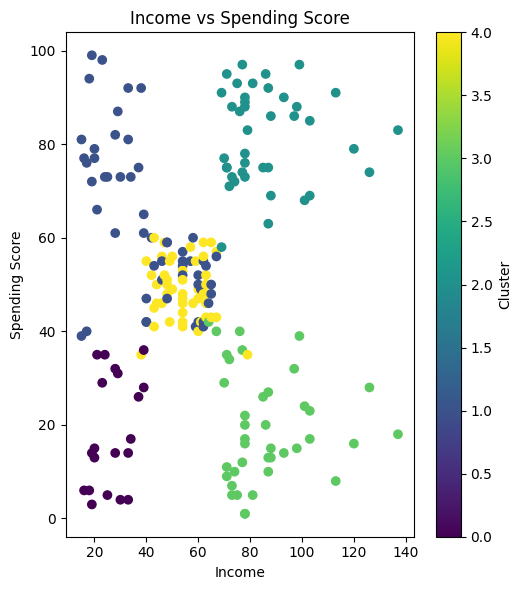

In [25]:
fig=plt.figure(figsize=(15,6))
ax3 = fig.add_subplot(133)
scatter = ax3.scatter(df['Income'], df['SpendingScore'], c=df['KMeans_Cluster'], cmap='viridis')
ax3.set_xlabel('Income')
ax3.set_ylabel('Spending Score')
ax3.set_title('Income vs Spending Score')
plt.colorbar(scatter, ax=ax3, label='Cluster')

plt.tight_layout()
plt.show()